<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/08_t_SNE_for_Stock_Movements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**t-SNE or T-distributed Stochastic Neighbour**

t-SNE or T-distributed Stochastic Neighbour Embedding is a machine learning algorithm for data visualization in machine learning. 

It is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. 

The t-SNE models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

The t-SNE algorithm comprises two main stages. 

**Stage I**

The t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects have a high probability of being picked while dissimilar points have an extremely small probability of being picked. 

**Stage II**

t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence (KL divergence) between the two distributions with respect to the locations of the points in the map. 

Note that while the original algorithm uses the Euclidean distance between objects as the base of its similarity metric, this should be changed as appropriate. 


Cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). 

The dataset contains daily price movements of stocks from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. 

And to account for this, a Normalizer is included at the beginning of the pipeline. 

The Normalizer separately transforms each company's stock price to a relative scale before the clustering begins.

A Normalizer() is very different from a StandardScaler(). While a StandardScaler() standardizes features by removing the mean and scaling to unit variance, the Normalizer() rescales each sample - here, each company's stock price - independently of the other.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = np.genfromtxt('company-stock-movements.csv', delimiter=',', dtype='str')
data

array([['', '2010-01-04', '2010-01-05', ..., '2013-10-25', '2013-10-28',
        '2013-10-29'],
       ['Apple', '0.5799999999999841', '-0.22000499999998624', ...,
        '-5.359961999999996', '0.8400189999999839',
        '-19.589980999999966'],
       ['AIG', '-0.6400020000000026', '-0.6500000000000021', ...,
        '-0.04000099999999662', '-0.40000200000000063',
        '0.6599999999999966'],
       ...,
       ['Exxon', '0.4300010000000043', '0.22999599999998566', ...,
        '-0.26000200000000007', '0.40000099999998895',
        '0.4800030000000106'],
       ['Xerox', '0.09000000000000163', '0.009999999999999787', ...,
        '-0.02999999999999936', '0.019999999999999574',
        '-0.02999999999999936'],
       ['Yahoo', '0.15999899999999911', '0.010001000000002591', ...,
        '-0.06000099999999975', '0.25999799999999595',
        '0.09999799999999937']], dtype='<U34')

In [0]:
companies = data[1:,0]
companies

array(['Apple', 'AIG', 'Amazon', 'American express', 'Boeing',
       'Bank of America', 'British American Tobacco', 'Canon',
       'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco',
       'Chevron', 'DuPont de Nemours', 'Dell', 'Ford',
       'General Electrics', 'Google/Alphabet', 'Goldman Sachs',
       'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel',
       'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark',
       'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M',
       'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman',
       'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris',
       'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony',
       'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total',
       'Taiwan Semiconductor Manufacturing', 'Texas instruments',
       'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart',
       'Exxon', 'Xerox', 'Yahoo'], dtype='<U34')

In [0]:
movements = data[1:, 1:].astype(float)
movements

array([[ 5.8000000e-01, -2.2000500e-01, -3.4099980e+00, ...,
        -5.3599620e+00,  8.4001900e-01, -1.9589981e+01],
       [-6.4000200e-01, -6.5000000e-01, -2.1000100e-01, ...,
        -4.0001000e-02, -4.0000200e-01,  6.6000000e-01],
       [-2.3500060e+00,  1.2600090e+00, -2.3500060e+00, ...,
         4.7900090e+00, -1.7600090e+00,  3.7400210e+00],
       ...,
       [ 4.3000100e-01,  2.2999600e-01,  5.7000000e-01, ...,
        -2.6000200e-01,  4.0000100e-01,  4.8000300e-01],
       [ 9.0000000e-02,  1.0000000e-02, -8.0000000e-02, ...,
        -3.0000000e-02,  2.0000000e-02, -3.0000000e-02],
       [ 1.5999900e-01,  1.0001000e-02,  0.0000000e+00, ...,
        -6.0001000e-02,  2.5999800e-01,  9.9998000e-02]])

In [0]:
# Import Modules
from sklearn.preprocessing import Normalizer
from sklearn.manifold import TSNE

In [0]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

In [0]:
# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

In [0]:
# Import TSNE
from sklearn.manifold import TSNE

In [0]:
# Create a TSNE instance: model
model = TSNE(learning_rate=50)

In [0]:
# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(movements)


In [0]:
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]


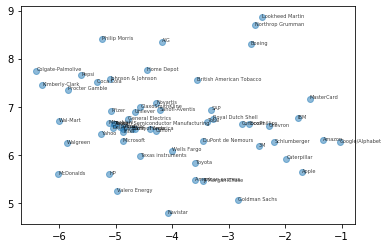

In [0]:
# Scatter plot
plt.scatter(xs, ys,alpha=0.5)
# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()